In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2023_MCD3735A/Módulo 5 - Transformación de variables numéricas/'
df=pd.read_csv(ruta+'numericos.csv')
df.head()

,0,1,2
0,0.255228,0.902346,0.733752
1,0.226339,0.925600,0.385178
2,0.205234,0.921390,0.547819
3,0.231553,0.885718,0.880428
4,0.185737,0.889161,0.953430


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

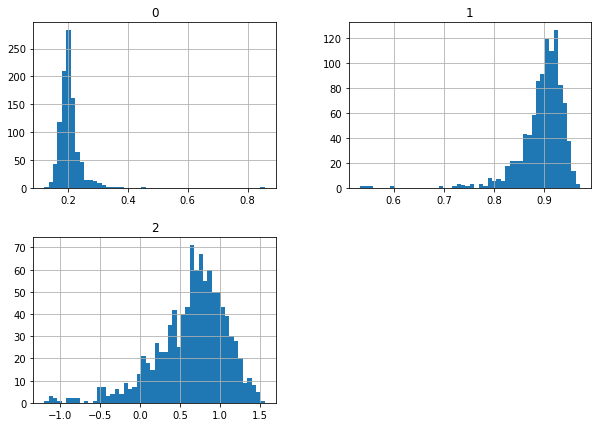

In [2]:
df.hist(figsize=(10,7),bins=50)

In [3]:
df.skew()

0    6.000314
1   -2.772736
2   -1.012379
dtype: float64

In [4]:
df_t=df.copy()
x=df['0']-df['0'].min()+1
df_t['0']=np.log(x)
df_t['0'].skew()

4.126351753705242

In [5]:
a=10
df_t['0']=x**(-a)
df_t['0'].skew()

-0.09285192946946622

<Axes: >

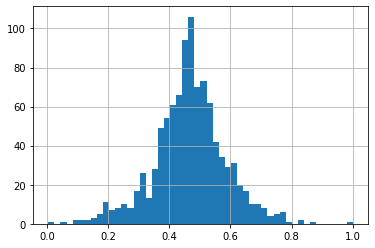

In [6]:
df_t['0'].hist(bins=50)

In [7]:
x_1=df['1']-df['1'].min()+1

In [8]:
a=17
df_t['1']=x_1**a
df_t['1'].skew()

-0.027448039332947635

<Axes: >

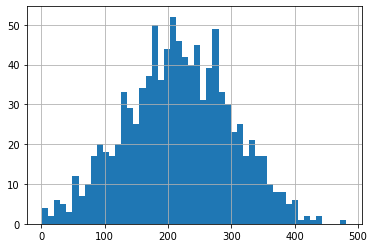

In [9]:
df_t['1'].hist(bins=50)

In [10]:
df['2'].min()

-1.190791463

In [11]:
x_2=df['2']-df['2'].min()+1

In [12]:
a=3
df_t['2']=x_2**a
df_t['2'].skew()

0.03113961761990119

<Axes: >

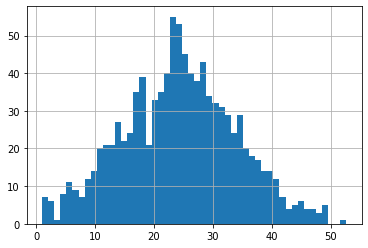

In [13]:
df_t['2'].hist(bins=50)

Los valores de $a$ encontrados para la transformación de potencia
$$
X'=X^a,
$$
para $X\in[0,\infty)$, son:
$$
\begin{array}{c|c|r}
variable&a& sesgo\\
\hline
0&-10&6.0\\
1&17&-2.77\\
2&3&-1.01
\end{array}
$$

---

In [14]:
df=pd.read_csv(ruta+'sesgo.csv')
df.head(2)

,1.0,1.1,1.2,1.4,1.5,2.5,3.0,0.7,0.6,0.8,...,0.4,-1.0,-0.8,-0.6,-0.5,-2.0,-1.5,-1.3,-2.5,-3.0
0,4.287419,4.078224,2.410316,1.864664,11.968746,-0.403019,0.473020,4.975822,3.037414,2.892491,...,0.838508,5.541238,4.947706,3.559693,7.864133,22.867150,22.242351,22.833589,21.672629,2.851895
1,6.692587,6.596364,-0.467649,4.196815,9.522961,-0.366849,0.211353,1.000911,1.497043,2.665020,...,1.213810,4.015426,7.715773,6.496774,5.833801,18.040815,22.122988,18.310630,21.197021,3.053828


In [15]:
df['2.5'].skew()

2.5102106851734143

In [16]:
df['-1.5'].skew()

-1.5035875693162464

In [17]:
a=np.arange(-20,20,0.5)
def finda(x):
  x/=x.max()-x.min()
  x-=x.min()-1
  xp=[np.log(x) if ai==0 else x**ai for ai in a]
  a_i=np.argmin([np.abs(xp_i.skew()) for xp_i in xp])
  return a[a_i],xp[a_i].skew()

In [29]:
print('Sesgo inicial \t Coeficiente \t Sesgo resultante')
for s in df.columns:
  print(s,'',*finda(df[s]),sep='\t')

Sesgo inicial 	 Coeficiente 	 Sesgo resultante
1.0		-2.0	-0.05802838874552088
1.1		-2.5	-0.003690664938058618
1.2		-3.0	-0.004446163785418097
1.4		-4.5	0.017180276902056892
1.5		-3.5	0.019550486054472845
2.5		-6.5	-0.011673114717123647
3.0		-16.5	-0.012988830665329923
0.7		-1.0	-0.07183441997474514
0.6		-0.5	-0.06841994993667176
0.8		-1.0	-0.04112235205492926
0.5		-0.5	0.01712881423610399
0.4		0.0	0.06796124424556627
-1.0		4.5	-0.009411523901301243
-0.8		3.5	-0.015690954310755918
-0.6		3.5	0.05466919687617774
-0.5		2.5	0.016148130190145805
-2.0		11.0	-0.02016849547297612
-1.5		9.0	0.0008323187045601433
-1.3		6.5	0.02147880310215788
-2.5		14.0	0.02101805792344316
-3.0		14.5	0.006024011553587757


In [40]:
d_sesgos

{'1.0': -2.140791793203222,
 '1.1': -2.4381011600396434,
 '1.2': -2.9465050812755016,
 '1.4': -4.118831047169451,
 '1.5': -3.2061496549152695,
 '2.5': -6.095254421753544,
 '3.0': -10.01257411392389,
 '0.7': -1.2375671304939164,
 '0.6': -0.7210680675337416,
 '0.8': -1.1272111374464944,
 '0.5': -0.4611487551227409,
 '0.4': -0.22648344159838812,
 '-1.0': 4.631682683933756,
 '-0.8': 3.464881700426965,
 '-0.6': 3.176810820393627,
 '-0.5': 2.515418743713785,
 '-2.0': 9.727119541393316,
 '-1.5': 7.680349185425632,
 '-1.3': 5.7733088489770115,
 '-2.5': 12.02510699381908,
 '-3.0': 13.557423188373619}

---

# Familia de transformaciones de potencia
$$
x'=\frac{x^\lambda-1}{\lambda},
$$
haciendo $\displaystyle\lim_{\lambda\rightarrow0}\frac{x^\lambda-1}{\lambda}$ se tiene
$$
x'=\ln(x).
$$

In [19]:
def potencias(x,lmb):
  if lmb==0:
    return np.log(x)
  else:
    return (x**lmb-1)/lmb

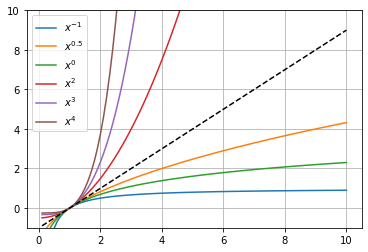

In [24]:
LMB=[-1,0.5,0,2,3,4]
x=np.linspace(0.1,10,100)
for lmb in LMB:
  plt.plot(x,potencias(x,lmb),label='$x^{'+str(lmb)+'}$')
plt.plot(x,x-1,'--k')
plt.legend()
plt.ylim([-1,10])
plt.grid()

## Transformación Box-Cox
$$
x'=\left\{\begin{array}{lr}
\dfrac{x^\lambda-1}{\lambda} & \lambda\neq0\\
\ln(x) & \lambda=0
\end{array}\right.
$$

In [30]:
from scipy.stats import boxcox

In [42]:
boxcox?

In [31]:
df_numericos=pd.read_csv(ruta+'numericos.csv')
df_numericos.head(2)

,0,1,2
0,0.255228,0.902346,0.733752
1,0.226339,0.925600,0.385178


In [34]:
copia_numericos=df_numericos.copy()
d_lmb={}
for var in df_numericos:
  x=df_numericos[var]
  copia_numericos[var],d_lmb[var]=boxcox(x-x.min()+1)
d_lmb

{'0': -11.394742571364604, '1': 16.085152354766866, '2': 2.753700109259396}

In [35]:
copia_numericos.skew()

0   -0.093338
1   -0.091563
2   -0.068733
dtype: float64

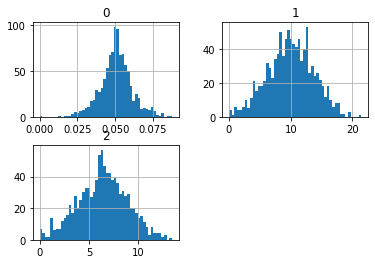

In [36]:
H=copia_numericos.hist(bins=50)

In [38]:
df_sesgos=pd.read_csv(ruta+'sesgo.csv')
df_sesgos.head(2)

,1.0,1.1,1.2,1.4,1.5,2.5,3.0,0.7,0.6,0.8,...,0.4,-1.0,-0.8,-0.6,-0.5,-2.0,-1.5,-1.3,-2.5,-3.0
0,4.287419,4.078224,2.410316,1.864664,11.968746,-0.403019,0.473020,4.975822,3.037414,2.892491,...,0.838508,5.541238,4.947706,3.559693,7.864133,22.867150,22.242351,22.833589,21.672629,2.851895
1,6.692587,6.596364,-0.467649,4.196815,9.522961,-0.366849,0.211353,1.000911,1.497043,2.665020,...,1.213810,4.015426,7.715773,6.496774,5.833801,18.040815,22.122988,18.310630,21.197021,3.053828


In [39]:
copia_sesgos=df_sesgos.copy()
d_sesgos={}
for var in df_sesgos:
  x=df_sesgos[var]/(df_sesgos[var].max()-df_sesgos[var].min())
  x += 1-x.min()
  copia_sesgos[var],d_sesgos[var]=boxcox(x)
d_sesgos

{'1.0': -2.140791793203222,
 '1.1': -2.4381011600396434,
 '1.2': -2.9465050812755016,
 '1.4': -4.118831047169451,
 '1.5': -3.2061496549152695,
 '2.5': -6.095254421753544,
 '3.0': -10.01257411392389,
 '0.7': -1.2375671304939164,
 '0.6': -0.7210680675337416,
 '0.8': -1.1272111374464944,
 '0.5': -0.4611487551227409,
 '0.4': -0.22648344159838812,
 '-1.0': 4.631682683933756,
 '-0.8': 3.464881700426965,
 '-0.6': 3.176810820393627,
 '-0.5': 2.515418743713785,
 '-2.0': 9.727119541393316,
 '-1.5': 7.680349185425632,
 '-1.3': 5.7733088489770115,
 '-2.5': 12.02510699381908,
 '-3.0': 13.557423188373619}

In [41]:
copia_sesgos.skew()

1.0     0.019463
1.1     0.020360
1.2     0.018161
1.4     0.058612
1.5     0.052676
2.5     0.094981
3.0     0.451310
0.7     0.001098
0.6    -0.005613
0.8    -0.003528
0.5    -0.005706
0.4    -0.002280
-1.0    0.020950
-0.8   -0.025100
-0.6   -0.021076
-0.5    0.020990
-2.0   -0.175715
-1.5   -0.173810
-1.3   -0.113927
-2.5   -0.183184
-3.0   -0.091167
dtype: float64

In [43]:
def boxcoxS(x,lmb):
  if lmb==0:
    return np.sign(x)*np.log(abs(x))
  else:
    return np.sign(x)*(abs(x)**lmb-1)/lmb

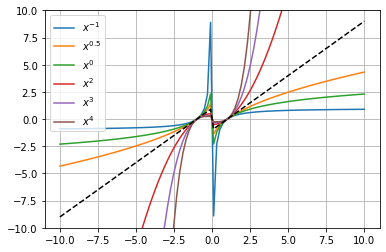

In [46]:
x=np.linspace(-10,10,100)
for lmb in LMB:
  plt.plot(x,boxcoxS(x,lmb),label='$x^{'+str(lmb)+'}$')
plt.legend()
plt.plot(x,(abs(x)-1)*np.sign(x),'--k')
plt.ylim([-10,10])
plt.grid()

In [48]:
def boxcoxS(x,lmb):
  xt=[]
  for xi in x:
    if xi<0:
      if lmb==0:
        xt.append(-np.log(-xi+1))
      else:
        xt.append(-((-xi+1)**lmb-1)/lmb)
    else:
      if lmb==0:
        xt.append(np.log(xi+1))
      else:
        xt.append(((xi+1)**lmb-1)/lmb)
  return np.array(xt)

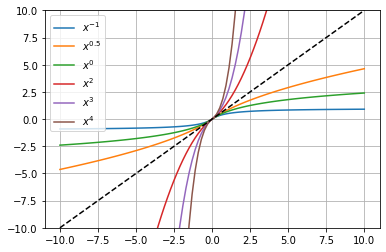

In [50]:
for lmb in LMB:
  plt.plot(x,boxcoxS(x,lmb),label='$x^{'+str(lmb)+'}$')
plt.plot(x,x,'--k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

## Yeo-Johnson
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda_1}-1}{\lambda_1} & \lambda_1\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda_1=0,\quad x\geq0\\
  -\frac{(-x+1)^{\lambda_2}-1}{\lambda_2} & \lambda_2\neq0,\quad x<0\\
  -\ln(-x+1) & \lambda_2=0,\quad x<0.
  \end{array}
  \right.
$$
Donde $\lambda_1+\lambda_2=2$.

Se sustituye $\lambda_2=2-\lambda_1$.
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda}-1}{\lambda} & \lambda\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda=0,\quad x\geq0\\
  -\frac{(-x+1)^{2-\lambda}-1}{2-\lambda} & \lambda\neq2,\quad x<0\\
  -\ln(-x+1) & \lambda=2,\quad x<0.
  \end{array}
  \right.
$$

In [51]:
from scipy.stats import yeojohnson

---
# Regresión

In [ ]:
df=pd.read_csv(ruta+'regresion.csv')
df.head()